# Programación como Herramienta para la Ingeniería 2020-2
## Ayudantía 1: Estructuras de datos y algoritmos
### Ayudante: Pablo Seisdedos (pcseisdedos@uc.cl)

# Problema 1 
Dada una lista de $N$ números enteros $x_{k} \in N$   (tanto positivos, como negativos), encuentre todos los índices $i \in \{0,...,|N|-1\}$ de la lista que realizan una partición de esta en dos grupos de igual suma, es decir, $\sum_{k=0}^{i-1}x_{k}=\sum_{k=i+1}^{|N|-1}x_{k}$
. Se pide retornar en una lista todos los índices que cumplen la condición. Por ejemplo, si la lista fuese [3,4,2,1], la respuesta debiese ser [1], dado que el el número 4 divide a la lista en [3] y [2,1] que suman lo mismo.

a) Resuelva el problema utilizando completamente fuerza bruta, es decir, analice todos los casos para entregar su respuesta y no use ninguna lógica que le ahorre tiempo de resolución. ¿De qué orden es la solución construida?

In [1]:
# Parte A
def division_lista_a(lista):
    resultado = []
    n = len(lista)
    for i in range(n):
        if sum(lista[0:i]) == sum(lista[i+1:n]):
            resultado.append(i)
            
    return resultado

In [2]:
lista = [0,-4,6,-4,-3,3,2,0]
print(division_lista_a(lista))

[0, 3, 7]


La solución construida es $O(n^2)$ porque itera una vez sobre cada uno de los n índices y en cada iteración suma todos los elementos de la izquierda y derecha (n-1 elementos). por esto la cantidad de operaciones es $n*(n-1) = n^2 - n$ lo que significa que el algoritmo es $O(n^2)$

b) Resuelva el mismo problema pero ahora debe reducir el orden de solución. Es decir, trate de optimizar el tiempo de solución de la parte (a). ¿De qué orden es la solución construida?

In [3]:
# Parte B
def division_lista_b(lista):
    resultado = []
    n = len(lista)
    
    izq = 0
    der = sum(lista)
    for i in range(n):
        der -= lista[i]
        if izq == der:
            resultado.append(i)
        izq += lista[i]   
        
    return resultado

In [4]:
lista = [0,-4,6,-4,-3,3,2,0]
print(division_lista_b(lista))

[0, 3, 7]


La solución construida es $O(n)$ porque primero suma una vez todos los elementos (n) y luego itera sobre cada uno de los n índices, en cada iteración realiza operaciones de orden 1 (sumar y restar dos números, evaluar si dos números son iguales y agregar un elemento a una lista si lo son. Por esto la cantidad de operaciones es 2*n lo que significa que el algoritmo es $O(n)$

c) Construya dos gráficos tamaño de input vs tiempo de ejecución para las soluciones de las parte (a) y (b). ¿Qué observa?

In [5]:
import time, random, math
import matplotlib.pyplot as plt

#Funcion para crear inputs
def inputs(size):
    L = [int(random.uniform(-min((10000, size))+1, min((10000,size))+1)) for _ in range(size)]
    return L

def tiempos(sizes):
    times_a = []
    times_b = []
    total_time_a = 0
    total_time_b = 0

    runs_per_size = 1

    for size in sizes:
        for _ in range(runs_per_size):

            #Creamos un input
            lista = inputs(size)

            #Ejecutamos el A
            start = time.time()
            division_lista_a(lista)
            end = time.time()
            total_time_a += end-start 

            #Ejecutamos el B
            start = time.time()
            division_lista_b(lista)
            end = time.time()
            total_time_b += end-start 


        times_a.append(total_time_a/runs_per_size)
        times_b.append(total_time_b/runs_per_size)
        
    return times_a, times_b
        
def graficar(times_a, times_b):
    plt.figure(figsize=(10,5))
    plt.plot(sizes, times_a, 'r', label = 'Fuerza bruta')  
    plt.plot(sizes, times_b, 'b', label = 'Optimizado')
    plt.title('Fuerza bruta vs Optimizad0', size = 20)
    plt.xlabel('Tamaño del input', size = 15)
    plt.ylabel('Tiempo [s]', size = 15)
    plt.legend()
    plt.show()

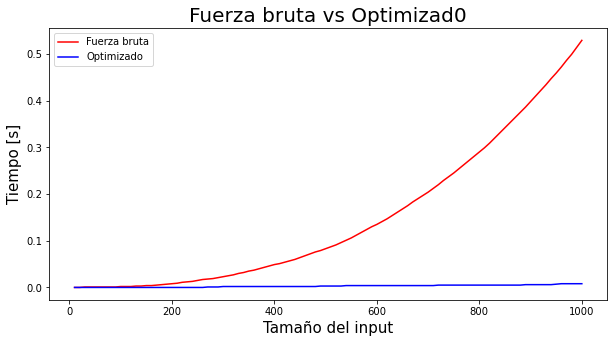

In [6]:
sizes = [10*x for x in range(1,101)]
graficar(*tiempos(sizes))

Se puede notar la clara tendencia cuadrática del algoritmo ineficiente, mientras que en el caso optimizado se ve una tendendia lineal.

# Problema 2 
Considere un conjunto de 𝐚 alumnos ($a \in \mathbb{N}^{+}$) donde cada uno tiene asociado una nota $𝒏$ ($𝑛  \in \mathbb{N}^{+}$). 

Escriba un programa que dado el conjunto de alumnos y sus notas, y un número $𝒌$ ($k \in \mathbb{N}^{+}$), retorne $𝒌$ grupos de estudio disjuntos, tales que la suma de las notas parciales de los alumnos en cada grupo sea la misma.


In [7]:
from time import time

In [8]:
def search(groups, notas, target):
        for group in groups:
            if sum(group) > target:
                return False
        if not notas: 
            return True
        
        v = notas.pop()
        for group in groups:
            group.append(v)
            if search(groups, notas, target): 
                return True
            group.pop()
        notas.append(v)
        return False

In [9]:
def grupos_estudio(notas, k):
    copia_notas = [] # una copia de la lista original
    pre_groups = []
    target, resto = divmod(sum(notas), k)
    if resto != 0 or len(notas) < k: 
        return []
    
    # Nuevo 
    for nota in notas:
        if nota > target:
            return []
        elif nota == target:
            k-=1
            pre_groups.append([target])
        else:
            copia_notas.append(nota)       
        

    groups = [[] for i in range(k)]    
    search(groups, copia_notas, target) #le paso la copia
    return groups + pre_groups

In [10]:
grupos_estudio([7,3,5,12,2,1,5,3,8,4,6,4], 5)

[[4, 6, 2], [4, 8], [3, 5, 1, 3], [5, 7], [12]]

# Problema 3
Dos strings son anagramas si al reordenar los caracteres de uno, es posible formar el otro. Teniendo esto en consideración, escribe un programa que dados dos strings, responda si estos son o no anagramas. Considere que no hay diferencia entre mayúsculas y minúsculas y que no se diferencian caracteres especiales (ej ó = o)

In [11]:
def normalizer(char):
    char = char.lower() # para no diferenciar mayúsculas de minúsculas
    eq = {'á':'a', 'é':'e', 'í':'i', 'ó':'o', 'ú':'u', 'ü':'u'} # para no diferenciar caracteres especiales
    if char in 'áéíóúü':
        char = eq[char]
    return char

def count_char(string):
    freqS = {}
    for l in string:
        l = normalizer(l)
        if not l in freqS:
            freqS[l] = 1
        else:
            freqS[l] += 1
    return freqS
    
def son_anagramas(string1, string2):
    if len(string1) != len(string2):
        return False
    f1 = count_char(string1)
    f2 = count_char(string2)
    return f1 == f2

In [12]:
son_anagramas("Irónicamente", "Renacimiento")

True